In [1]:
import mashcima as mc
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Loading symbols...
Preparing symbols...
Skipping invalid ledger line:  MUSCIMA-pp_1.0___CVC-MUSCIMA_W-24_N-18_D-ideal___429
Loading default sprite: time_0
Loading default sprite: time_1
Loading default sprite: time_9
Symbols loaded.


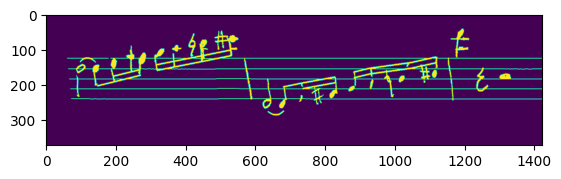

In [2]:
# the input annotation
annotation = " h2 ( ) e=2 =s=3 #4 =s4 s=5 =s=6 N7 =s=7 #8 =s8 | h-5 ( ) e=-5 =s=-4 #-3 =s-3 s=-2 =s=-1 N0 =s=0 #1 =s1 | q9 qr hr"

# turn the annotation into an image
#img = mc.synthesize(annotation)
img = mc.synthesize_for_training(annotation)
#img = mc.synthesize_for_beauty(annotation)

# display the image
plt.imshow(img)
plt.show()

In [3]:
annotation = mc.generate_random_annotation()
annotation

'clef.C2 t=-9 =e=-8 * =s-9 . * er * time.C/'

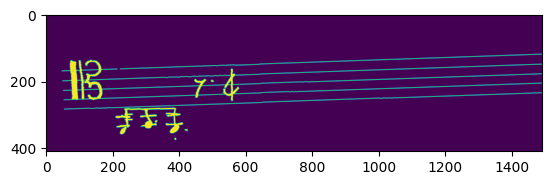

In [4]:
img = mc.synthesize_for_training(annotation)
#img = mc.synthesize_for_beauty(annotation)

# display the image
plt.imshow(img)
plt.show()

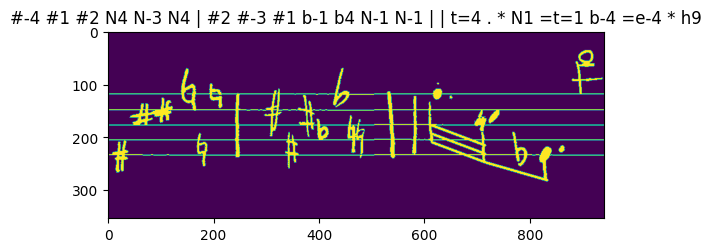

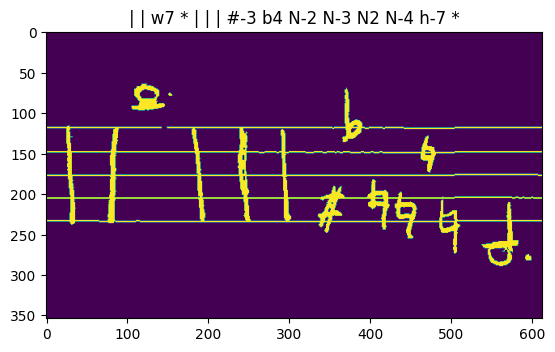

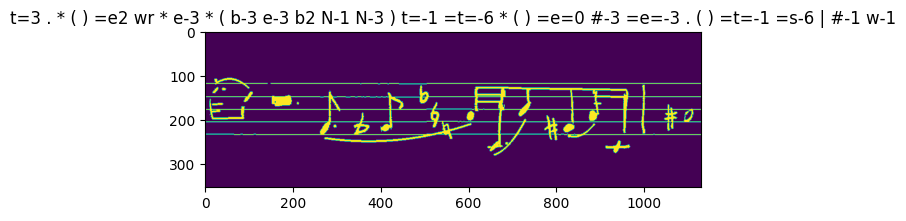

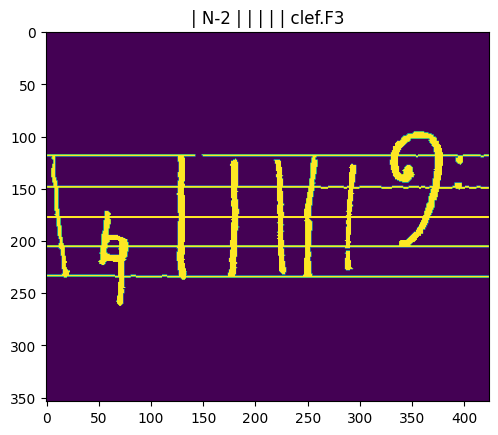

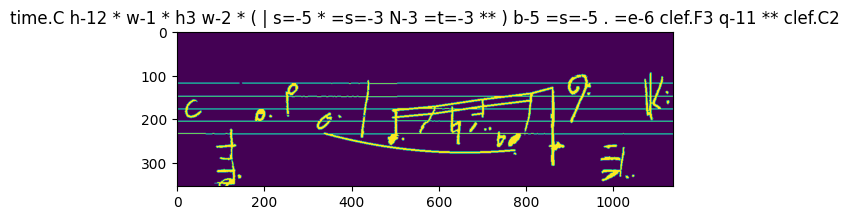

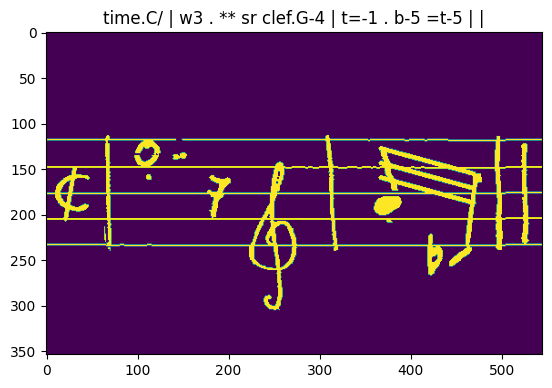

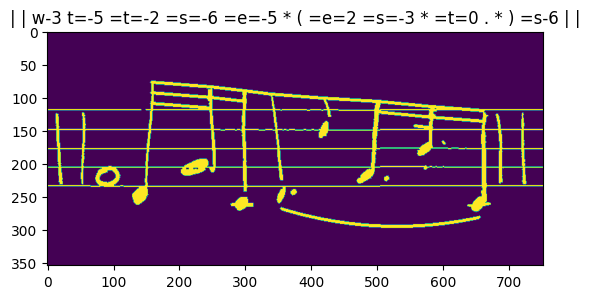

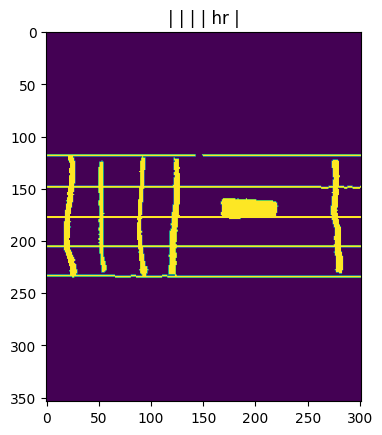

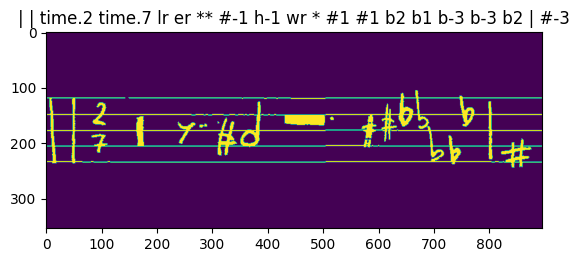

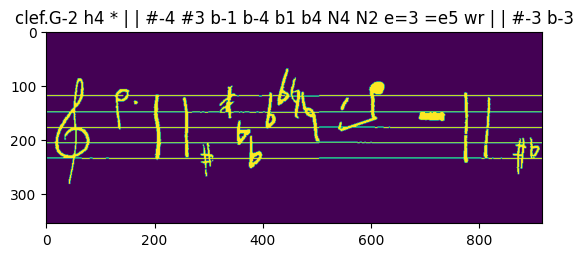

In [5]:
for _ in range(10):
    a = mc.generate_random_annotation()
    img = mc.synthesize_for_beauty(a)
    plt.title(a)
    plt.imshow(img)
    plt.show()

In [6]:
yell = [253,231,36]
blu = [68,1,84]
blck = [0,0,0]
whit = [255,255,255]
cols = [yell,blu,blck,whit]


In [7]:
def euclidean(c1,c2):
    dist = 0
    for i in range(len(c1)):
        dist += (c1[i]-c2[i])**2
    dist = dist**(0.5)
    return dist

In [8]:
def get_closest_color(c):
    min_d = 800000
    min_c = c
    for col in cols:
        cur_dist = euclidean(c,col)
        if cur_dist < min_d:
            min_d = cur_dist
            min_c = col
    return min_c

In [9]:
img.shape

(354, 917)

In [40]:
notes = ['C','D','E','F','G','A','B']

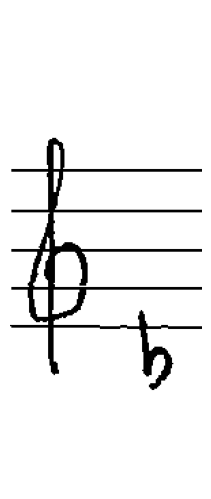

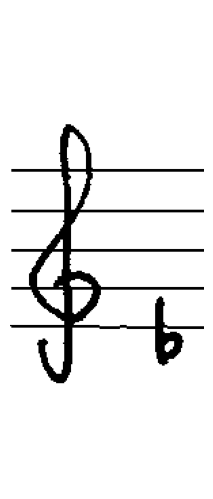

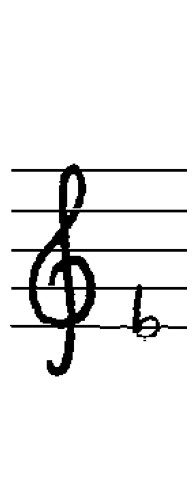

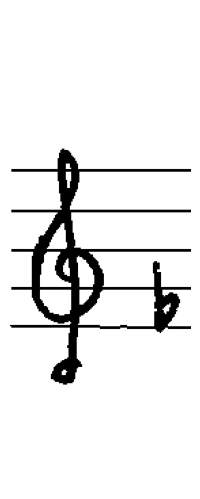

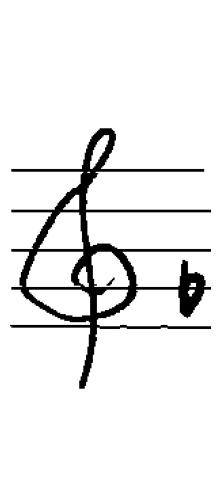

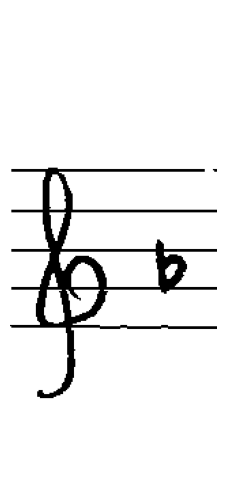

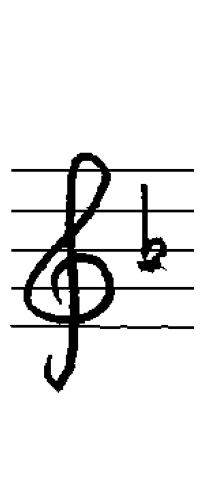

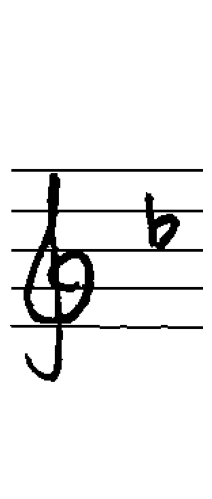

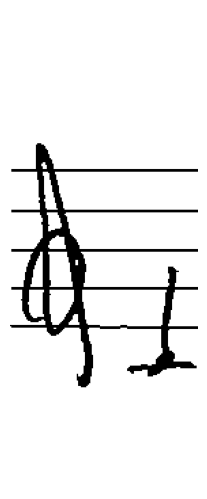

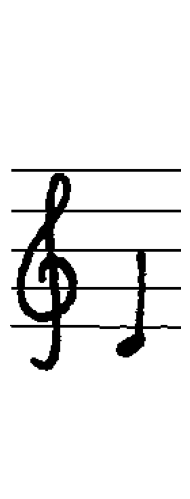

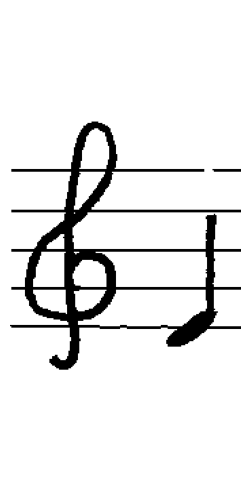

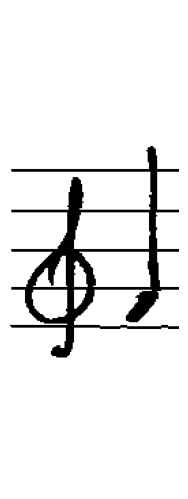

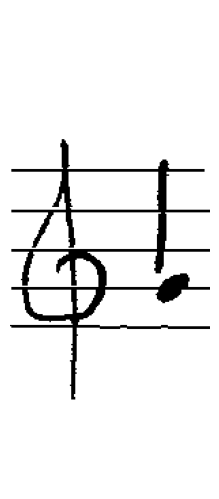

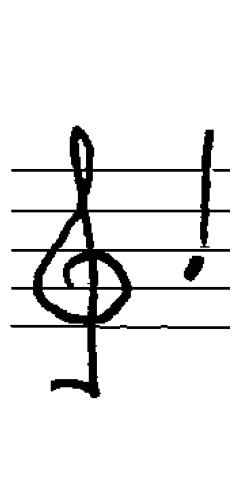

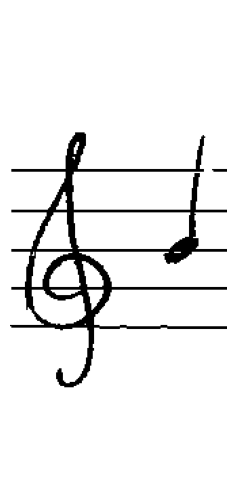

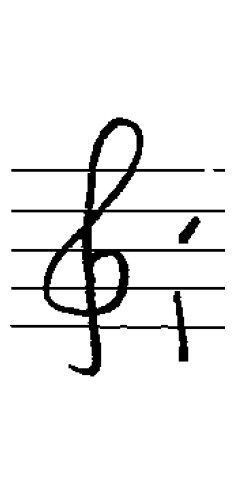

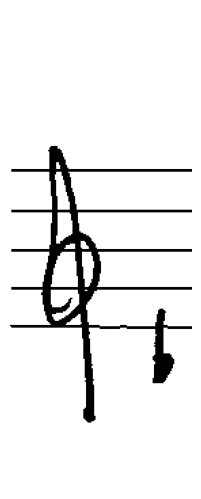

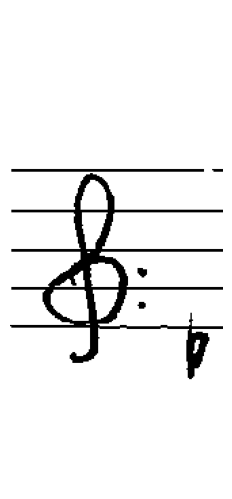

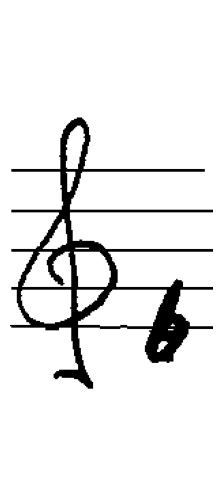

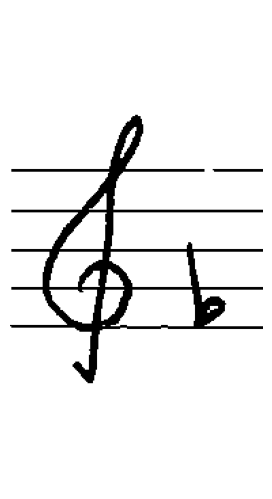

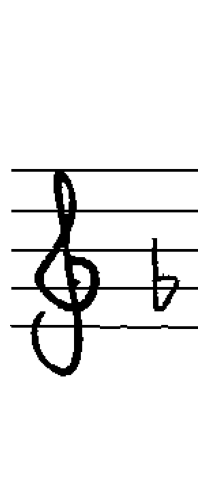

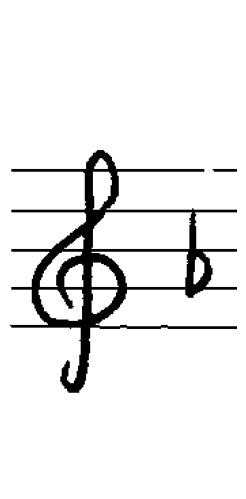

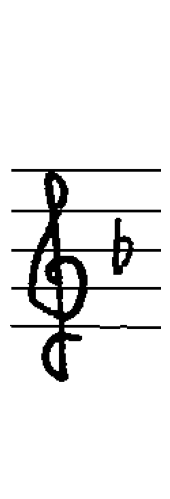

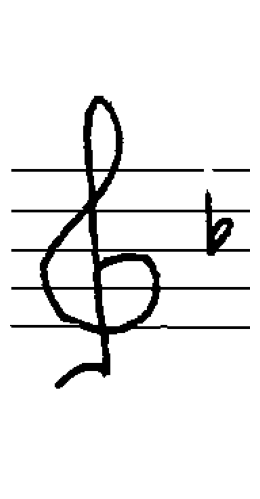

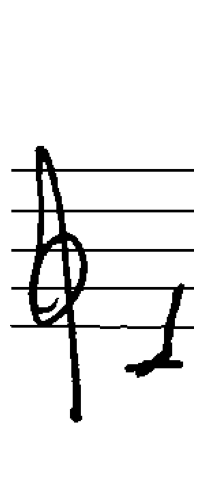

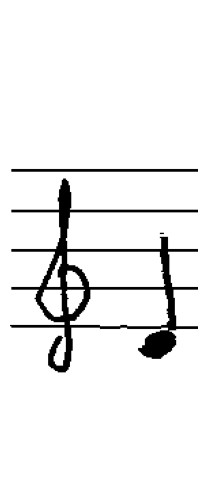

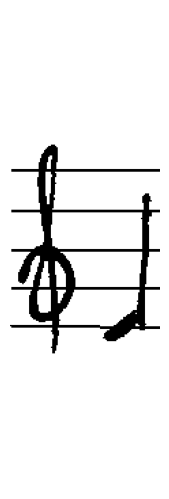

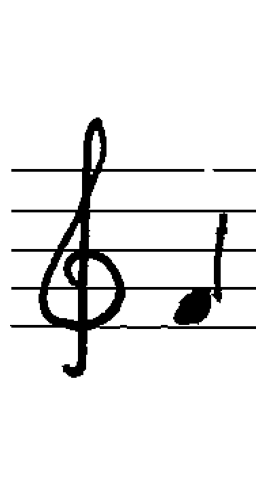

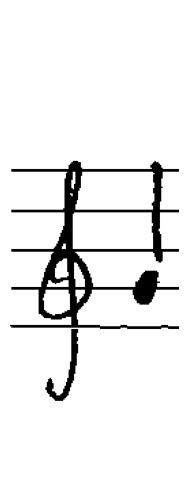

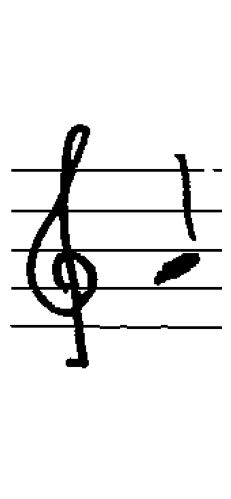

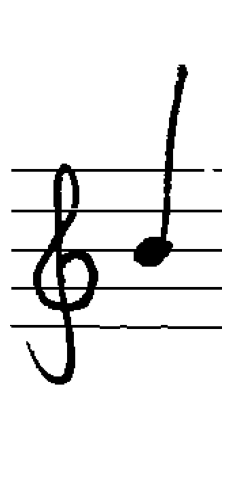

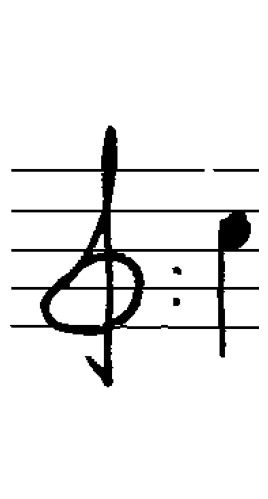

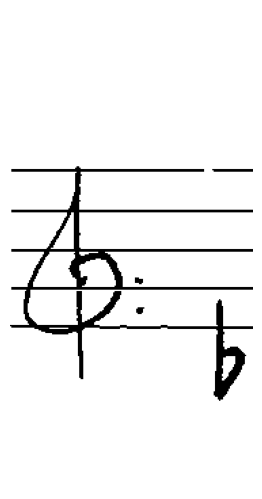

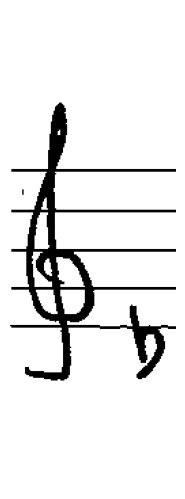

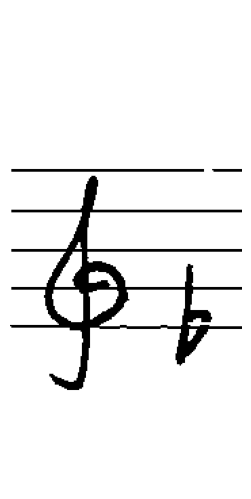

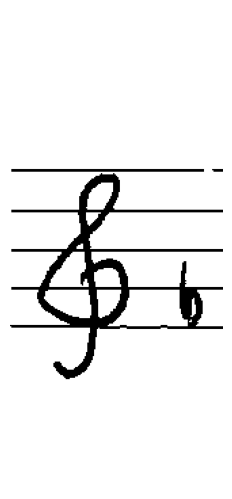

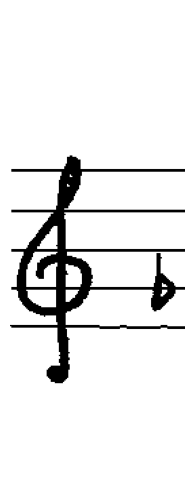

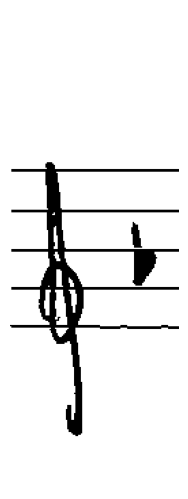

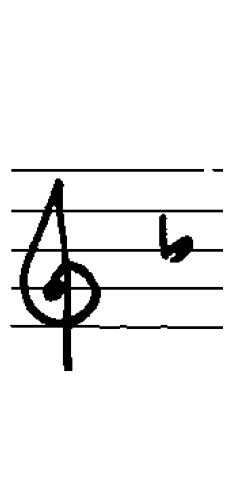

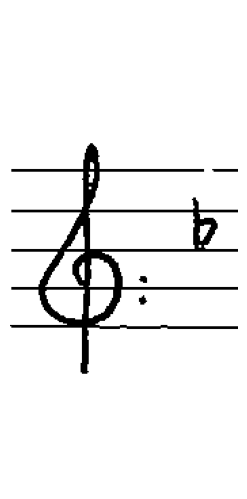

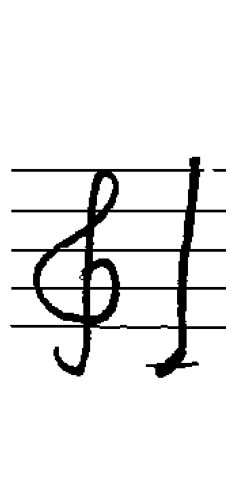

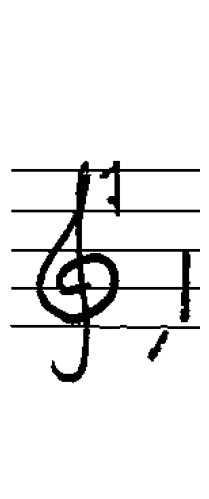

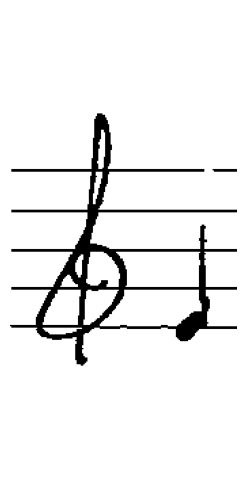

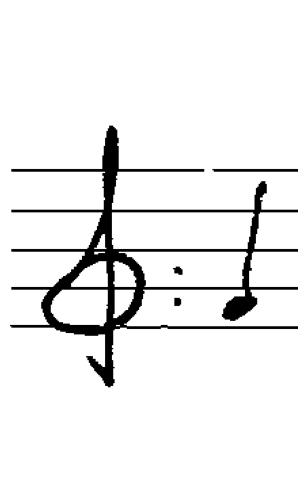

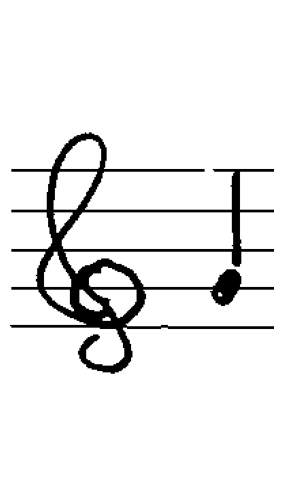

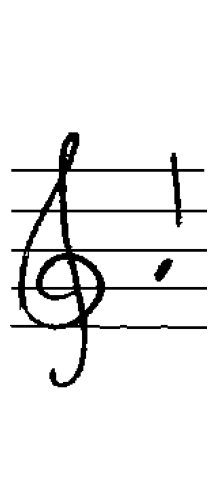

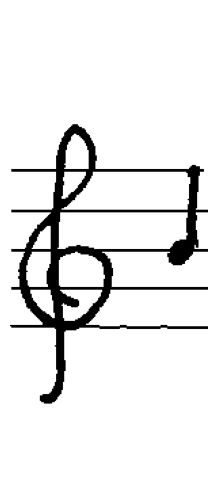

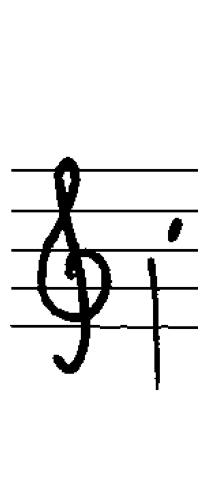

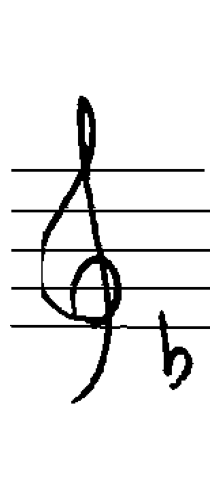

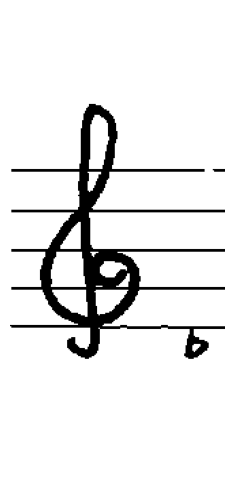

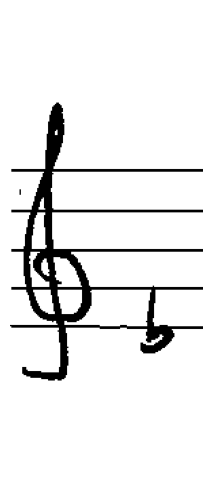

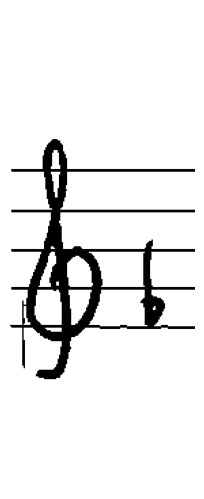

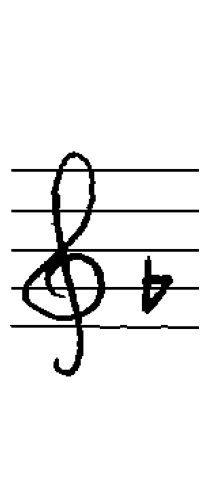

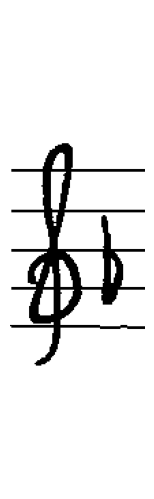

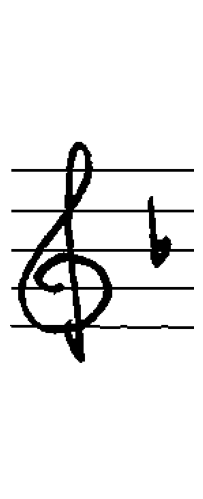

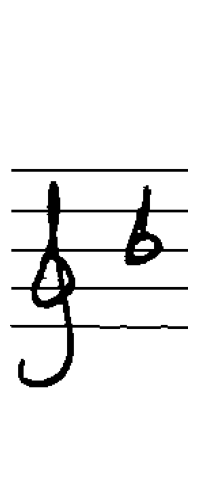

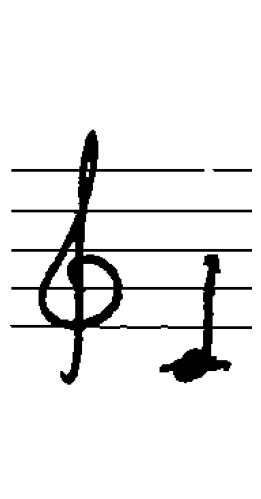

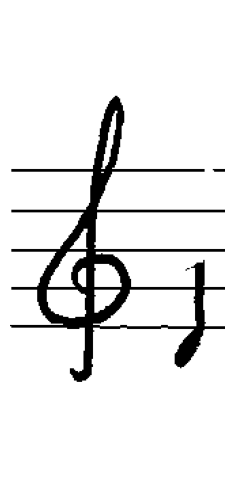

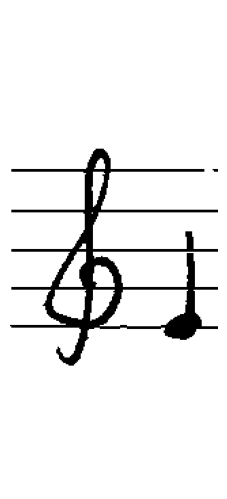

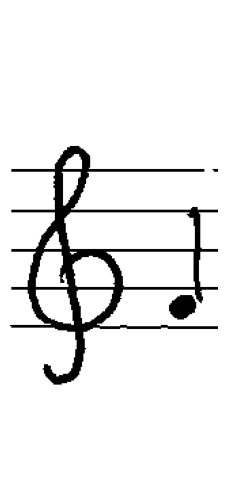

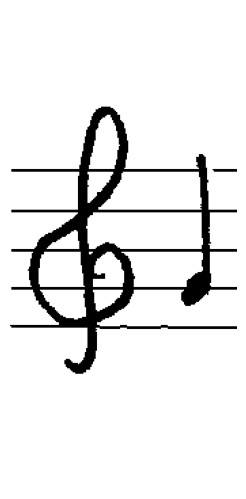

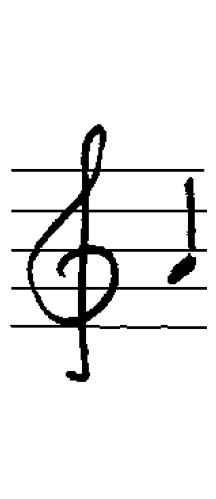

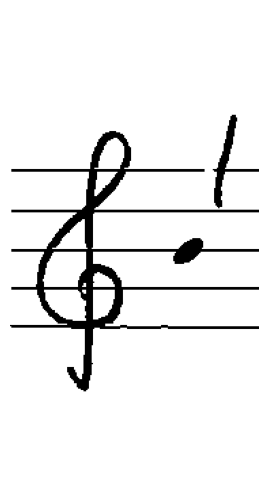

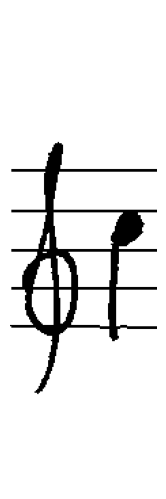

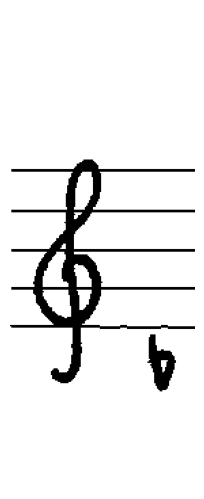

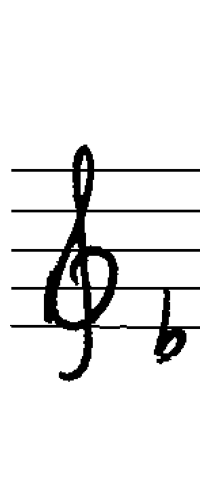

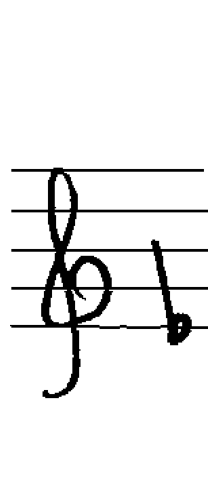

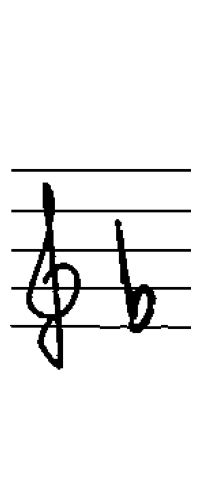

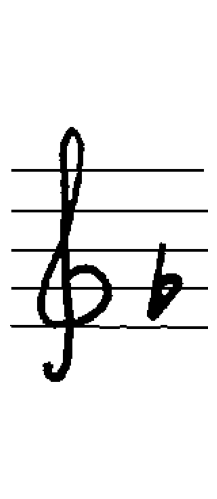

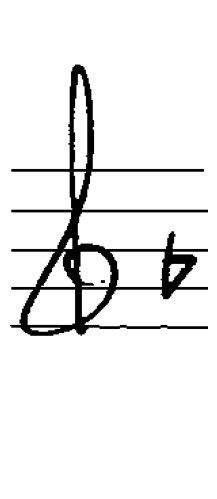

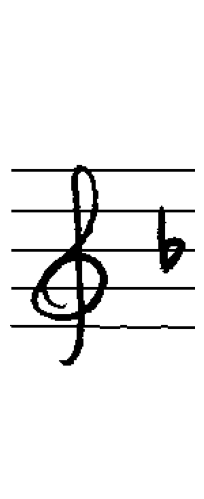

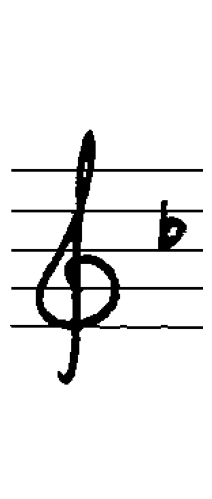

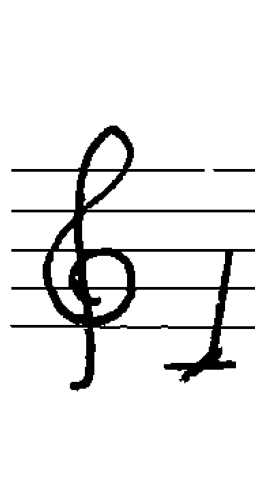

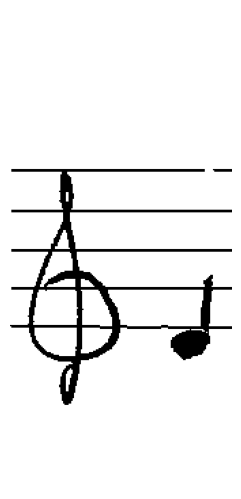

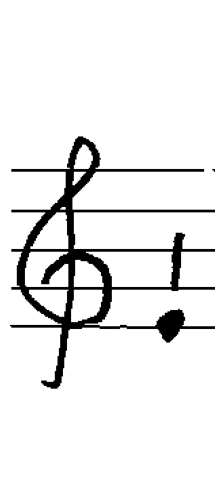

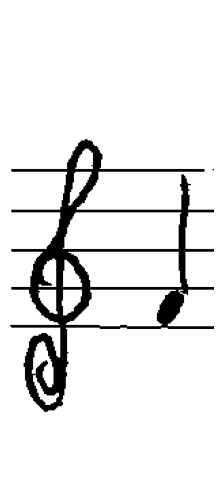

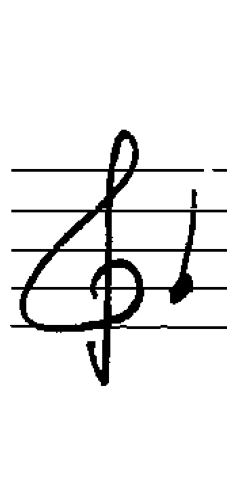

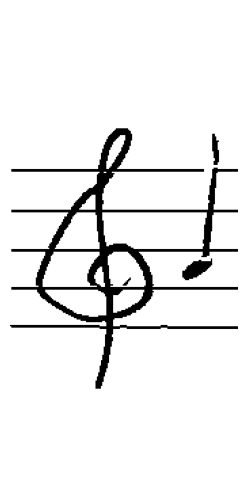

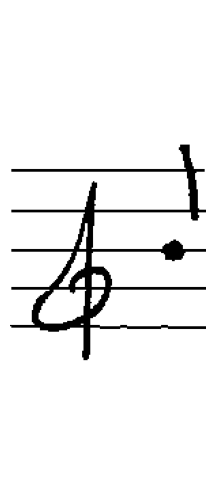

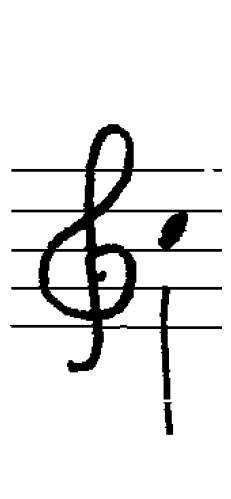

In [48]:
ann = "clef.G-2"
lttr = ['b','q']
nums = list(range(-6,2))
names = []
for _ in range(5):
    for l in lttr:
        for n in nums:
            a = f'{ann} {l}{n}'
            img_ori = mc.synthesize_for_beauty(a)
            img = img_ori.copy()
            img_normalized = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
            img_normalized = img_normalized.astype(np.uint8)
            pil_img = Image.fromarray(img_normalized)
            pil_img = pil_img.convert('RGB')
            # Accessing pixel data
            pixels = pil_img.load()
            width, height = pil_img.size
            # Example: Inverting colors
            for i in range(width):
                for j in range(height):
                    r, g, b = pixels[i, j]
                    pixels[i, j] = (255 - r, 255 - g, 255 - b)
            img = np.array(pil_img)
            fig, ax = plt.subplots()
            ax.axis('off')
            ax.set_xticks([])
            ax.set_yticks([])
            note = notes[(n+6)%7]
            file_name = f'./notes/{note}{4+(n+6)//7}-0.png'
            if file_name not in names:
                print(f'{file_name} is not in the array, apppending it')
                names.append(file_name)
            else:
                print(f'{file_name} in the array')
                counter = 1
                while file_name in names:
                    file_name = f'./notes/{note}{4+(n+6)//7}-{counter}.png'
                    print(f'Checking {file_name}')
                    counter += 1
                names.append(file_name)
            pil_img.save(file_name)
            #plt.tight_layout()
            #plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
            #plt.imshow(img)
            #plt.show()

In [11]:
img[180][60]

0.0

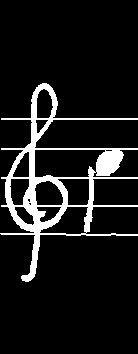

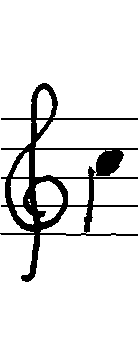

In [33]:
# Accessing pixel data
pixels = pil_img.load()
width, height = pil_img.size
# Example: Inverting colors
for i in range(width):
    for j in range(height):
            pixels[i, j] = 255 - pixels[i,j]
pil_img

In [13]:
values = []
for i in img:
    for j in i:
        if j not in values:
            values.append(j)
values

[0.0, 1.0]

In [27]:
pixels[0,1]

0